# 5. Polinomyal Regression

## a) Aplicada a nube de datos

### Importando librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creación y graficación de la nube de datos

El primer paso es crear la nube de datos, para ello se usa la función random de la librería numpy:

In [24]:
m = 300
x = 2 * np.random.rand(m, 1)
y = 3 + 4*x + x**2 + 1.2*np.random.randn(m, 1)

Se visualiza la nube de datos:

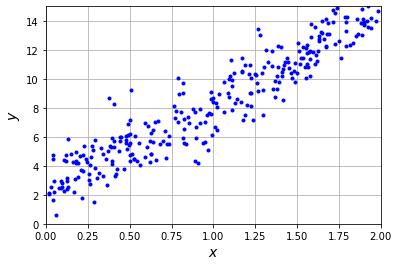

In [25]:
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

Se hará uso de la ecuación normal, para ello se define una función cuyos parámetros serán los datos tanto para entrenar, como para realizar las predicciones, usando el parámetro percent para representar el porcentaje de datos que se usará para entrenar y separarlos de los que se utilizarán para probar el modelo.

In [27]:
def normal_equation_ply(X, Y, percent):
    '''Esta función sirve para utilizar el método de regresión lineal con ecuación normal
    normal_equation(X, Y): 
    X: Matriz columna de inputs 
    Y: Matriz columna de outputs
    percent: % de datos que seran utilizados para el test (base 100)
    
    Return: indices_test, indices_train, theta, Y_predict
    
    indices_test: indices de los valores utilizados para el test
    indices_train: indices de los valores utilizados para el entrenamiento
    theta: valores correspondientes a theta_n
    Y_predict: valores de Y obtenidos de la predicción
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    indices_test = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    indices_train = list(np.arange(0, m))
    
    for indice in indices_test:
        indices_train.remove(indice)

    X_train = np.c_[X.iloc[indices_train]]
    X_test = np.c_[X.iloc[indices_test]]
    Y_train = np.c_[Y.iloc[indices_train]]
    Y_test = np.c_[Y.iloc[indices_test]]
    
    # Entrenamiento
    m = len(X_train)
    
    X_b = np.c_[X_train]
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y_train
    
    # test
    
    m = len(X_test)
    
    X_b_test = np.c_[X_test]
    Y_predict = X_b_test @ theta
    
    return theta, indices_test, indices_train, Y_predict

Para realizar la regresión polinomial se utilizará la librería de sklearn, de la cual se utiliza utiliza la función polynomial features.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(x)


In [29]:
X_quad = pd.DataFrame(X_quad)
y = pd.DataFrame(y)
theta, test_index, train_index, Y_predict = normal_equation_ply(X_quad, y, 20)
x = pd.DataFrame(x)

A continuación se procede a visualizar la nube de puntos vs las predicciones

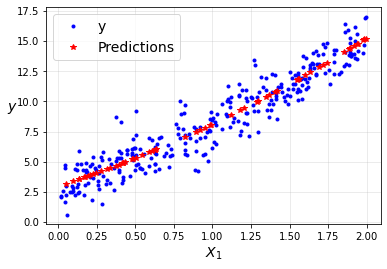

In [56]:
plt.plot(np.c_[x], np.c_[y], "b.", label = 'y')
plt.plot(np.c_[x.iloc[test_index]], Y_predict, "r*", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.grid(alpha= 0.3)
plt.show()

In [59]:
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(np.c_[y.iloc[test_index]], Y_predict)}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(np.c_[y.iloc[test_index]], Y_predict)}')
print(f'R²: {round(metrics.r2_score(np.c_[y.iloc[test_index]], Y_predict), 2)}')

MAE: 1.0247237065121666
MAPE: 0.17302923501602885
R²: 0.92


### Vizualizando función cuadrática con los valores de $\theta$

Se definie una función cuadrática para realizar la regresión polinomial con un polinomio de grado dos

In [53]:
def cuadratic_fun(theta, x):
    return theta[0] + theta[1]*x + theta[2]*x**2
x_1 = np.arange(0,10,0.02)

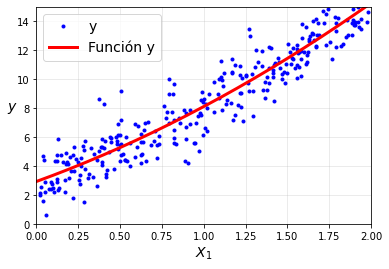

In [54]:
plt.plot(np.c_[x], np.c_[y], "b.", label = 'y')
plt.plot(x_1, cuadratic_fun(theta, x_1), "r-", linewidth=3, label="Función y")
#plt.plot(np.c_[x.iloc[test_index]], Y_predict, "r-", linewidth=2, label="Función y")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(alpha= 0.3)
plt.show()

### Realizando el ejercicio con sklearn

Se realiza el entrenamiento, para ello se importa train_test_split de la librería de sklearn, la cual divide el conjunto de datos en arreglos para realizar el train y el test (20% del set de datos se apartan para el test).

In [42]:
from sklearn.model_selection import train_test_split
X_quad = quadratic.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_quad, y, test_size = 0.20, random_state = 42)
pr.fit(x_train, y_train)
y_predict = pr.predict(x_test)

In [52]:
inter = np.c_[pr.intercept_]
coef = np.c_[pr.coef_]

Se define a continuación la función cuadrática de donde se obtendrá el polinomio de grado dos 

In [47]:
def fun_cuadratica_sklearn(inter, coef, x):
    return inter[0] + coef[:, 1]*x + coef[:, 2]*x**2
x_i = np.arange(0, 10, 0.02)
curva_y = fun_cuadratica_sklearn(inter, coef, x_i)

Se grafican la nube de datos y la predicción que es una cuadrática

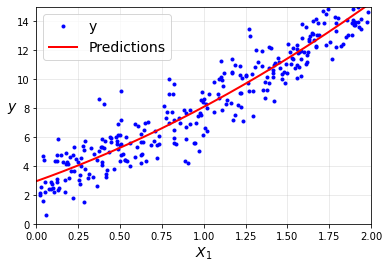

In [49]:
plt.plot(np.c_[x], np.c_[y], "b.", label = 'y')
#plt.plot(np.c_[x.iloc[test_index]], Y_predict, "r-", linewidth=2, label="Función")
#plt.plot(x_test[:, 1], y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x_i, curva_y, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(alpha= 0.3)
plt.show()

### Comparación de resultados

In [50]:
theta

array([[2.95924914],
       [4.18583433],
       [0.98503097]])

In [51]:
print(pr.intercept_)
print(pr.coef_)

[2.98287]
[[0.         4.09429851 1.03082541]]


## b) Aplicado a base de datos B

In [60]:
df_red = pd.read_csv('datos/red_wine_clean.csv')
df_white = pd.read_csv('datos/white_wine_clean.csv')
df_red = df_red.drop('Unnamed: 0', axis=1)
df_white = df_white.drop('Unnamed: 0', axis=1)
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.319444,0.655367,0.000000,0.291667,0.448718,0.243902,0.241379,0.630058,0.770270,0.353846,0.148936,5
1,0.375000,0.858757,0.000000,0.583333,0.730769,0.585366,0.525862,0.514451,0.351351,0.538462,0.234043,5
2,0.375000,0.723164,0.054795,0.458333,0.653846,0.341463,0.413793,0.537572,0.432432,0.492308,0.234043,5
3,0.847222,0.180791,0.767123,0.291667,0.435897,0.390244,0.465517,0.653179,0.297297,0.384615,0.234043,6
4,0.319444,0.655367,0.000000,0.291667,0.448718,0.243902,0.241379,0.630058,0.770270,0.353846,0.148936,5


El primer paso es cargar los datos de los csv, y se muestran para observar la información de las columnas.

In [61]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.550,0.469136,0.553191,0.939252,0.535714,0.551282,0.636752,0.935354,0.243243,0.425926,0.068966,6
1,0.375,0.543210,0.510638,0.046729,0.607143,0.153846,0.474359,0.463973,0.648649,0.500000,0.189655,6
2,0.825,0.493827,0.638298,0.294393,0.625000,0.358974,0.324786,0.538047,0.594595,0.407407,0.293103,6
3,0.600,0.370370,0.468085,0.369159,0.767857,0.576923,0.705128,0.571717,0.500000,0.333333,0.258621,6
4,0.600,0.370370,0.468085,0.369159,0.767857,0.576923,0.705128,0.571717,0.500000,0.333333,0.258621,6


Para seleccionar los features a utilzia, primero es necesario mostrar la correlación de estas, para ello se hace uso de la librería seaborn

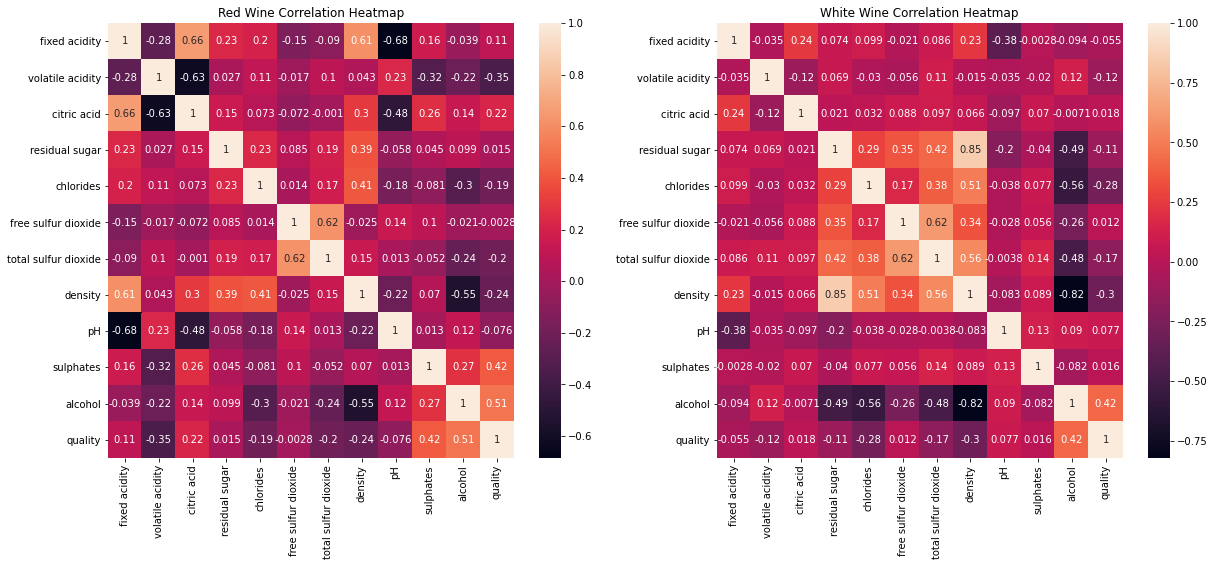

In [64]:
import seaborn as sns
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
sns.heatmap(df_red.corr(), annot=True)
plt.title('Red Wine Correlation Heatmap')
plt.subplot(1, 2, 2)
sns.heatmap(df_white.corr(), annot=True)
plt.title('White Wine Correlation Heatmap')
plt.show()

In [66]:
columnas = df_red.columns
columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [67]:
#x_red = df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       #'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       #'pH', 'sulphates', 'alcohol']]

Se guarda en un dataframe aparte las columnas donde encuentran los dataframe a utilizar de las columnas a usar en el aprendizaje

In [136]:
x_red = df_red[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [137]:
x_red.head(3)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.319444,0.655367,0.000000,0.448718,0.241379,0.630058,0.770270,0.353846,0.148936
1,0.375000,0.858757,0.000000,0.730769,0.525862,0.514451,0.351351,0.538462,0.234043
2,0.375000,0.723164,0.054795,0.653846,0.413793,0.537572,0.432432,0.492308,0.234043


In [138]:
#x_white = df_white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       #'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       #'pH', 'sulphates', 'alcohol']]

In [139]:
x_white = df_white[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [140]:
x_white.head(3)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.550,0.469136,0.553191,0.535714,0.636752,0.935354,0.243243,0.425926,0.068966
1,0.375,0.543210,0.510638,0.607143,0.474359,0.463973,0.648649,0.500000,0.189655
2,0.825,0.493827,0.638298,0.625000,0.324786,0.538047,0.594595,0.407407,0.293103


In [141]:
y_red = df_red[['quality']]
y_red.head(3)

,quality
0,5
1,5
2,5


In [142]:
y_white = df_white[['quality']]
y_white.head(3)

,quality
0,6
1,6
2,6


### Aplicando sklearn a la base de datos "red wine"

Aquí también se hace uso de la librería sklearn para aplicar el algoritmo de polynomial regression a la base de datos de vinos rojos, usando un polinomio de grado dos.

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pr_red = LinearRegression()
quadratic_red = PolynomialFeatures(degree=2)
X_quad_red = quadratic_red.fit_transform(x_red)

In [144]:
X_quad_red.shape

(1194, 55)

Se realiza el entrenamiento; de la misma forma se utiliza un 20% del set de datos para el test al usar la función train_test_split

In [145]:
from sklearn.model_selection import train_test_split
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(X_quad_red, y_red, test_size = 0.20, random_state = 42)
pr_red.fit(x_red_train, y_red_train)
y_red_predict = pr_red.predict(x_red_test)

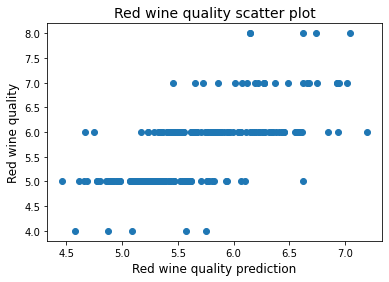

In [146]:
plt.scatter(y_red_predict, y_red_test)
plt.title('Red wine quality scatter plot', fontsize=14)
plt.xlabel('Red wine quality prediction', fontsize=12)
plt.ylabel('Red wine quality', fontsize=12)
plt.show()

In [147]:
MAE_red = round(metrics.mean_absolute_error(y_red_test, y_red_predict), 3)
MAPE_red = round(metrics.mean_absolute_percentage_error(y_red_test, y_red_predict), 3)
#R_2_red = round(metrics.r2_score(y_red_test, y_red_predict), 3)
print(f'Red Wine MAE: {MAE_red}')
print(f'Red Wine MAPE: {MAPE_red}')
#print(f'Red Wine R^2: {R_2_red}')

Red Wine MAE: 0.439
Red Wine MAPE: 0.077


### Aplicando sklearn a la base de datos "white wine"

Aquí también se hace uso de la librería sklearn para aplicar el algoritmo de polynomial regression a la base de datos de vinos blancos, usando un polinomio de grado dos.

In [148]:
pr_white = LinearRegression()
quadratic_white = PolynomialFeatures(degree=2)
X_quad_white = quadratic_white.fit_transform(x_white)

Se realiza el entrenamiento

In [149]:
from sklearn.model_selection import train_test_split
x_white_train, x_white_test, y_white_train, y_white_test = train_test_split(X_quad_white, y_white, test_size = 0.20, random_state = 42)
pr_white.fit(x_white_train, y_white_train)
y_white_predict = pr_white.predict(x_white_test)

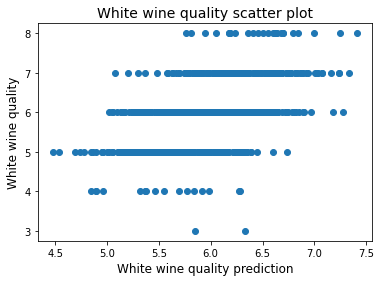

In [150]:
plt.scatter(y_white_predict, y_white_test)
plt.title('White wine quality scatter plot', fontsize=14)
plt.xlabel('White wine quality prediction', fontsize=12)
plt.ylabel('White wine quality', fontsize=12)
plt.show()

In [151]:
MAE_white = round(metrics.mean_absolute_error(y_white_test, y_white_predict), 3)
MAPE_white = round(metrics.mean_absolute_percentage_error(y_white_test, y_white_predict), 3)
print(f'White Wine MAE: {MAE_white}')
print(f'White Wine MAPE: {MAPE_white}')


White Wine MAE: 0.552
White Wine MAPE: 0.096


In [153]:
from IPython.display import HTML, display_html, display
resultados = pd.DataFrame({'Indicador': ['MAE', 'MAPE'], 'Red Wine': [MAE_red, MAPE_red], 'White Wine': [MAE_white, MAPE_white]})
resultados = resultados.set_index('Indicador')
display(HTML('<h4>Resultados obtenidos para los modelos implementados</h4>'))
display_html(resultados)

,Red Wine,White Wine
Indicador,,
MAE,0.439,0.552
MAPE,0.077,0.096


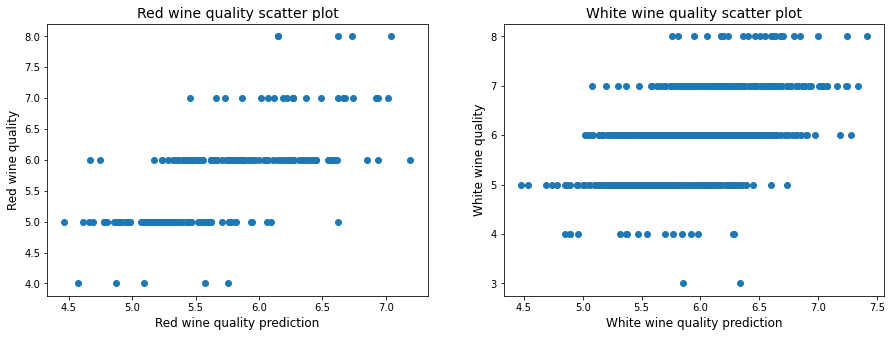

In [154]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_red_predict, y_red_test)
plt.title('Red wine quality scatter plot', fontsize=14)
plt.xlabel('Red wine quality prediction', fontsize=12)
plt.ylabel('Red wine quality', fontsize=12)
plt.subplot(1, 2, 2)
plt.scatter(y_white_predict, y_white_test)
plt.title('White wine quality scatter plot', fontsize=14)
plt.xlabel('White wine quality prediction', fontsize=12)
plt.ylabel('White wine quality', fontsize=12)
plt.show()